In [3]:
from sklearn.cluster import KMeans #K-Means clustering.
import pandas as pd #Package with multiple methods of data filtering.
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range.

from matplotlib import pyplot as plt #For plottting data in multiple ways
#To render a figure in a notebook
%matplotlib inline 

In [4]:
X = pd.read_csv('/content/drive/MyDrive/ML DataSet/Updated_product_des.csv') #Read dataset
X1 = X.head(150) #Store top 150 rows of the dataset
X1 #Print

,Product_Id,Product_title,Product_price,User_Id,Profile_name,Helpfullness,Ratings,Time_stamp,Summary,Review
0,B000179R3I,Amazon.com: Austin Reed Dartmouth Jacket In B...,unknown,A3Q0VJTUO4EZ56,"Jeanmarie Kabala ""JP Kabala""",7,4,1182816000,This a an american blazer. Red in Color.,I own the Austin Reed dartmouth blazer in eve...
1,B000GKXY34,"Nun Chuck, Novelty: Nun Toss Toy",17.99,ADX8VLDUOL7BG,M. Gingras,0,5,1262304000,Cotton Raymond Blazer,Got these last Christmas as a gag gift. They ...
2,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,A3NM6P6BIWTIAE,Maria Carpenter,0,3,1224633600,Iphone 11 256 gb,Gave this to my dad for a gag gift after dire...
3,1882931173,Its Only Art If Its Well Hung!,unknown,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7,4,940636800,Refurbished Iphone X,This is only for Julie Strain fans. It's a co...
4,B00002066I,ah,15.99,unknown,unknown,3,5,939772800,Iphone 8 64 gb,I hope a lot of people hear this cd. We need ...
...,...,...,...,...,...,...,...,...,...,...
145,B000JINSBG,A Walk in the Woods,unknown,A3V0MK4KOD61KO,"porsche driver ""porsche driver""",1,5,1243728000,A walk in the woods,This is an old play I saw on stage many years ...
146,895554224,Saint Hyacinth of Poland,13.95,unknown,unknown,3,5,984009600,Review from the Publisher,Tells the wonderful story of how St. Hyacinth...
147,895554224,Saint Hyacinth of Poland,13.95,A1IVIK8YJRIQWU,"Nov 10 ""Tom""",2,4,945648000,A miracle on every page!,Who was Saint Hyacinth? The story starts with...
148,B000EVS4TY,"Arrowhead Mills Cookie Mix, Chocolate Chip, 1...",unknown,A2SRVDDDOQ8QJL,MJ23447,2,4,1206576000,Delicious cookie mix,I thought it was funny that I bought this pro...


In [5]:
X2 = X1[["Product_Id","Ratings"]]#Assign matrix to X2 containing just Prouduct Id and Ratings.
X2

,Product_Id,Ratings
0,B000179R3I,4
1,B000GKXY34,5
2,B000GKXY34,3
3,1882931173,4
4,B00002066I,5
...,...,...
145,B000JINSBG,5
146,895554224,5
147,895554224,4
148,B000EVS4TY,4


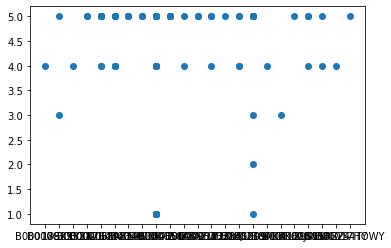

In [6]:
plt.scatter(X2['Product_Id'],X2['Ratings']) #Plots ratings vs ProductId

In [7]:
km = KMeans(n_clusters=5) #CLusters of 5 because we have ratings out of 5.
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
y = km.fit_predict(X2[['Ratings']]) #Assign values in array form based on ratings.
y

array([2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 3, 4, 1, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 2, 2, 0], dtype=int32)

In [9]:
X2['cluster'] = y #Adds a column named 'cluster'

Data1=X2[["Product_Id","Ratings","cluster"]] #Storing X2 in series named Data1
Data1 #To display


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Product_Id,Ratings,cluster
0,B000179R3I,4,2
1,B000GKXY34,5,0
2,B000GKXY34,3,3
3,1882931173,4,2
4,B00002066I,5,0
...,...,...,...
145,B000JINSBG,5,0
146,895554224,5,0
147,895554224,4,2
148,B000EVS4TY,4,2


No handles with labels found to put in legend.


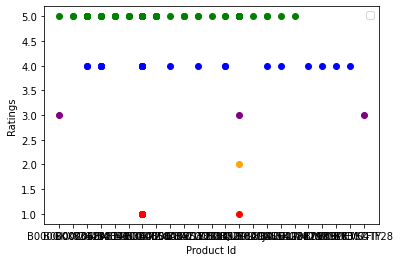

In [11]:
# Assign values to variable Y based on the cluster.
Y1=X2[X2.cluster==0]
Y2=X2[X2.cluster==1]
Y3=X2[X2.cluster==2]
Y4=X2[X2.cluster==3]
Y5=X2[X2.cluster==4]

#Assigns a particular color to each color.
plt.scatter(Y1.Product_Id,Y1['Ratings'], color='green')
plt.scatter(Y2.Product_Id,Y2['Ratings'], color='red')
plt.scatter(Y3.Product_Id,Y3['Ratings'], color='blue')
plt.scatter(Y4.Product_Id,Y4['Ratings'], color='purple')
plt.scatter(Y5.Product_Id,Y5['Ratings'], color='orange')

#Plot
plt.xlabel('Product Id')
plt.ylabel('Ratings')
plt.legend()



In [12]:
#User-Built function that displays similar products based on user input 
def show_recommendations(id):
  out1 = X2.query("Product_Id == @id")
  final = out1.Ratings
  out2 = X2.loc[X2['Ratings'].isin(final)]
  return out2[["Product_Id","Ratings"]]

In [13]:
show_recommendations("B000179R3I")

,Product_Id,Ratings
0,B000179R3I,4
3,1882931173,4
12,B000058A81,4
20,B000058A81,4
63,826414346,4
64,826414346,4
65,826414346,4
69,826414346,4
78,595344550,4
89,595344550,4
